# Introdução 

# 1- Dataset no formato tabular

O dataset cora também está disponível no formato csv através da página do grupo <a href='https://linqs.soe.ucsc.edu/data'> LINQS </a>. No entanto, não é necessário realizar o download, pois ele já consta na pasta <a href='cora.csv'>cora.csv</a> do diretório atual deste notebook. Para tanto, vamos referenciar o arquivo <code>cora.content</code> (matriz de características e classes) e <code>cora.cites</code> (relações de citação).

In [1]:
path_content = 'cora.csv/cora.content'
path_cites = 'cora.csv/cora.cites'

Em seguida, vamos importar as tabela a partir do <code>pandas</code>

In [2]:
import pandas as pd


#Carrega citações
cites = pd.read_csv(path_cites, sep='\t', header=None, names=['target','source'])

#Nome das colunas referentes às palavras
feature_names = [f'P_{_}' for _ in range(1433)]

#Define o nome de todas as colunas para a tabela de características e classificações
column_names = ['id'] + feature_names + ['label']

#Carrega características e classificações
content = pd.read_csv(path_content, sep='\t', header=None, names=column_names)

#Ordena a tabela de acordo com o id do artigo
content = content.sort_values('id')


Agora, vamos visualizar a tabela contendo as características e as classificações:

In [3]:
content

,id,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,...,P_1424,P_1425,P_1426,P_1427,P_1428,P_1429,P_1430,P_1431,P_1432,label
163,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
168,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
552,114,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
1459,117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
554,128,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1154500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based
1953,1154520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
1955,1154524,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rule_Learning
1956,1154525,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rule_Learning


Agora, vamos visualizar a tabela contendo as citações:

In [4]:
cites

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


# 2- Análise de PDFs

Segundo o <a href= 'http://eliassi.org/papers/ai-mag-tr08.pdf'> artigo </a> que referencia o dataset cora que empregamos até o momento, durante o preprocessamento das publicações do dataset, houve a remoção de _stopwords_ e normalização textual. Para visualizar essas técnincas, vamos carregar um pdf de amostra que discute sobre vieses em machine learning:

In [5]:
#!conda install -c conda-forge pdfplumber -y

In [6]:
import pdfplumber


#PDF_PATH = 'CAMINHO PARA O SEU PDF'

PDF_PATH = 'Vieses em machine learning.pdf'


#Carrega o PDF
pdf = pdfplumber.open(PDF_PATH)

#Verifica a quantidade de páginas
num_pages = len(pdf.pages)

#String para o texto do PDF
text_from_pdf = ''

#Para cada página, extraia o texto 
for _ in range(num_pages):
    text_from_pdf +=  pdf.pages[_].extract_text()

#Todas as palavras minúsculas
text_from_pdf = text_from_pdf.lower()

In [7]:
text_from_pdf

'vieses em sistemas de machine learning\nlucas f. zampar1\n1departamento de ciências exatas e tecnológicas – universidade federal do amapá\n(unifap)\n68903-329– macapá – ap – brasil\nlucas.26.zampar@gmail.com\nabstract. the present work aims to present the problem of bias in the\ndevelopment of machine learning systems.\nresumo. o presente trabalho visa apresentar a problemática de vieses no\ndesenvolvimento de sistemas de machine learning.\n1. introdução\nos algoritmos de ml (machine learning) têm ganhado destaque ultimamente\npela aplicação em diferentes áreas, bem como a crescente presença nas atividades\ncotidianas. por exemplo, algoritmos do tipo podem ser encontrados nos sistemas de\nrecomendações personalizadas das plataformas destreaming,de reconhecimento da fala\nnossmartphones, de reconhecimento facial nas redessociais, etc.\nno entanto, apesar dos numerosos benefícios, ainda há muitas preocupações\nreferentes a tais tecnologias. dentre elas, é possível citar a presença de vi

Em seguida, realizaremos a tokenização e remoção das _stopwords_ do texto. Vamos fazer isso por meio do módulo NLTK:

In [8]:
#!conda install -c conda-forge spacy -y
#!python -m nltk.downloader popular
#!python -m nltk.downloader rslp

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

#Conjunto de stopwords do Português
stop_words = set(stopwords.words('portuguese')) 

#Tokenizção textual 
word_tokens = word_tokenize(text_from_pdf)

#Seleciona palavras que não são stopword em uma lista
filtered_sentence = [w for w in word_tokens if w not in stop_words] 

#Aplicamos também a remoção para o inglês neste exemplo
stop_words = set(stopwords.words('english')) 
filtered_sentence = [w for w in filtered_sentence if w not in stop_words] 


In [10]:
#Verifica a remoção de algumas stopwords
print('a' in filtered_sentence)
print('em' in filtered_sentence)
print('de' in filtered_sentence)

False
False
False


Agora, vamos realizar a normalização textual por meio de _lemmatization_. Infelimente, ele não se aplica para palavras do Portugês:

In [11]:
from nltk.stem import WordNetLemmatizer

#Instancia o stemmer
wordnet_lemmatizer = WordNetLemmatizer()

#Para cara palavra, aplique o stemmer
filtered_sentence = [wordnet_lemmatizer.lemmatize(word) for word in filtered_sentence]

Podemos também aplicar a normalização textual por meio _lemmatization_ para palavras do Inglês:

Por fim, podemos eliminar pontuações e números:

In [12]:
from string import punctuation

#Elimina pontuações
filtered_sentence =  [c for c in filtered_sentence if c not in punctuation]

#Elimina dígitos 
filtered_sentence =  [c for c in filtered_sentence if not c.isdigit()]

#Eliminaremos também palavras com menos de dois caracteres, por exemplo, et al
filtered_sentence =  [c for c in filtered_sentence if not len(c) <= 2]


Após o preprocessamento textual, podemos visualizar as 10 palavras mais frequentes no texto:

In [13]:
import pandas as pd

df = pd.Series(filtered_sentence).value_counts().to_frame()[:10]
df.columns = ['Frequência']

df

,Frequência
viés,10
sistemas,10
machine,8
learning,7
fonte,7
ser,7
forma,6
vieses,5
dado,5
datasets,5


Como esperado, entre as 10 palavras mais frequentes neste texto, encontram-se as palavras referentes ao tema discutido como: viés, vieses, machine, learning, dado e dataset.

Para melhorar a visualização, podemos plotar um gráfico de barras:

<AxesSubplot:>

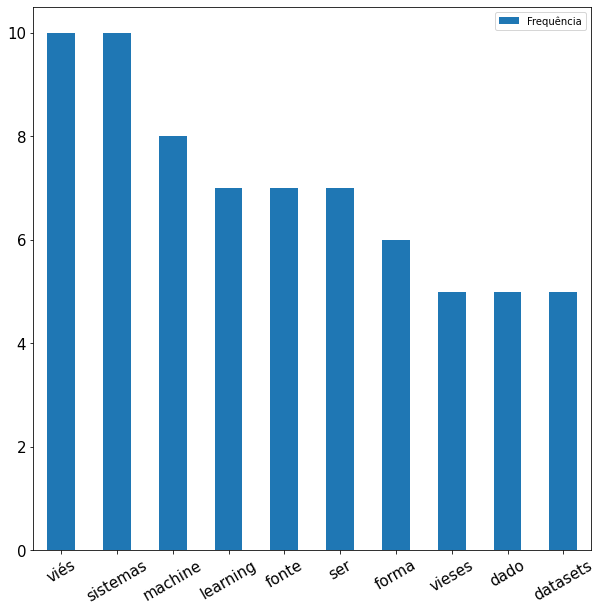

In [14]:
df.plot(kind='bar', figsize=(10,10), rot=30, fontsize=15)

# 3- Definindo funções

Podemos transformar o que foi visto acima em funções a fim de utilizar em outros PDFs que desejar. A seguir, temos a função que extrai páginas:

In [15]:
import pdfplumber


def extract_text(pdf_path):
    pdf = pdfplumber.open(pdf_path)
    num_pages = len(pdf.pages)
    text_from_pdf = ''
    for _ in range(num_pages):
        text_from_pdf +=  pdf.pages[_].extract_text()

    return text_from_pdf.lower()


Em seguida, vamos realizar a limpeza do texto:

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from string import punctuation
from string import digits


def has_unwanted(word):
    
    #Você pode especificar caracteres indesejados nesta função
    #Por exempo, o código comentado especifica aspas
    #if word == '\'':
    #    return True
    
    if len(word) <= 2:
        return True
    
    #Especifica palavras com pontuação ou dígitos
    for c in word: 
        if c in punctuation or c in digits:
            return True 
    
    return False
    

def text_cleaning(text):

    
    stop_words = set(stopwords.words('portuguese')) 
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize (text) 
    
    filtered_sentence = [w for w in word_tokens if w not in stop_words] 
    
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in filtered_sentence if w not in stop_words] 
    
    filtered_sentence = [wordnet_lemmatizer.lemmatize(word) for word in filtered_sentence]
    filtered_sentence = [w for w in filtered_sentence if not has_unwanted(w)]
    
    
    return filtered_sentence


Em seguida, vamos definir a tabela de frequência das palavras mais comuns nos documentos:

In [17]:
import pandas as pd

def freq_table(filtered_pdf, itens=10):
    df = pd.Series(filtered_pdf).value_counts().to_frame()[:itens]
    df.columns = ['Frequência']
    return df

Por fim, podemos definir a função que exiba o gráfico em barras a partir da tabela de frequência:

In [18]:
def show_freq(df, color='blue'):
    df.plot(kind='bar', figsize=(10,10), rot=30, fontsize=15, color=color)

Pronto, agora basta aplicar em um exemplo:

In [19]:
PDF_PATH = 'Vieses em machine learning.pdf'

In [20]:
text_from_pdf = extract_text(PDF_PATH)
filtered_text = text_cleaning(text_from_pdf)
freq_words = freq_table(filtered_text)
freq_words

,Frequência
sistemas,10
viés,10
machine,8
learning,7
ser,7
fonte,7
forma,6
datasets,5
dado,5
vieses,5


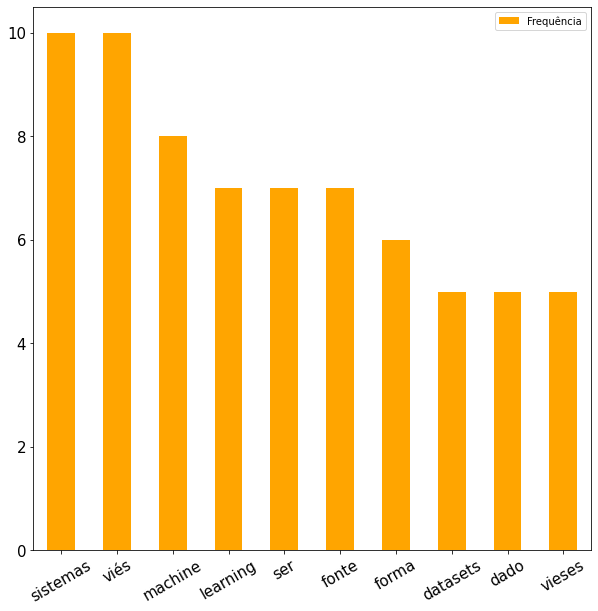

In [21]:
show_freq(freq_words, color='orange')